In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('usa_mercedes_benz_prices.csv')

df = df.dropna()
df = df.drop(['Mileage', 'Price'], axis=1)

feature1 = df.iloc[:, 1]
feature2 = df.iloc[:, 2]

In [2]:
# normalisation par la moyenne et l'écart type
feature1 = (feature1 - np.mean(feature1)) / np.std(feature1)
feature2 = (feature2 - np.mean(feature2)) / np.std(feature2)
print(df)

                                           Name  Rating  Review
0       2021 Mercedes-Benz A-Class A 220 4MATIC     3.9  1800.0
1             2022 Mercedes-Benz AMG SL 63 Base     4.7  1239.0
2             2022 Mercedes-Benz AMG SL 63 Base     4.7  1239.0
3       2020 Mercedes-Benz AMG E 53 Base 4MATIC     4.8   752.0
4     2021 Mercedes-Benz AMG GLS 63 Base 4MATIC     5.0  1502.0
...                                         ...     ...     ...
2423          2020 Mercedes-Benz AMG GT 53 Base     4.7  1424.0
2425          2022 Mercedes-Benz S-Class 4MATIC     4.5  1334.0
2426     2021 Mercedes-Benz GLB 250 Base 4MATIC     4.9  2375.0
2427    2023 Mercedes-Benz E-Class E 450 4MATIC     4.8  1758.0
2428            2023 Mercedes-Benz GLA 250 Base     4.5  2057.0

[2135 rows x 3 columns]


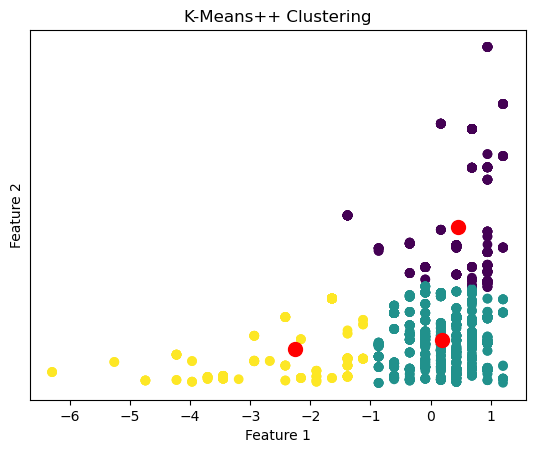

In [3]:
def kmeans_plusplus(X, k):

    centroids = [X[np.random.choice(range(X.shape[0]))]]

    while len(centroids) < k:
        distances = np.array([min([np.linalg.norm(x - c)**2 for c in centroids]) for x in X])
        prob = distances / np.sum(distances)
        next_centroid = X[np.random.choice(range(X.shape[0]), p=prob)]
        centroids.append(next_centroid)

    centroids = np.array(centroids)

    while True:
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels, centroids = kmeans_plusplus(np.array([feature1, feature2]).T, 3)


plt.scatter(feature1, feature2, c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means++ Clustering')
plt.yticks([])
plt.show()
